CSE 256

Final Project - Code for baseline section

In [ ]:
import librosa
import os
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
meta = pd.read_csv('drive/MyDrive/speakers_all.csv')
display(meta)



,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False,NaN,NaN,NaN
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False,NaN,NaN,NaN
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False,NaN,NaN,NaN
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False,NaN,NaN,NaN


In [ ]:
meta['age'].describe()

meta['sex'].value_counts()

meta['native_language'].describe()

count        2172
unique        214
top       english
freq          579
Name: native_language, dtype: object

In [ ]:
country_list = list(meta['native_language'].value_counts().keys())
print(country_list)


country_list = ['english', 'spanish', 'arabic', 'mandarin', 'french', 'korean']

['english', 'spanish', 'arabic', 'mandarin', 'french', 'korean', 'portuguese', 'russian', 'dutch', 'turkish', 'german', 'polish', 'italian', 'japanese', 'macedonian', 'cantonese', 'farsi', 'vietnamese', 'swedish', 'amharic', 'romanian', 'tagalog', 'hindi', 'bulgarian', 'serbian', 'bengali', 'urdu', 'greek', 'thai', 'nepali', 'miskito', 'ukrainian', 'kurdish', 'pashto', 'punjabi', 'bosnian', 'czech', 'hausa', 'hebrew', 'hungarian', 'albanian', 'kiswahili', 'gujarati', 'mongolian', 'croatian', 'armenian', 'danish', 'taiwanese', 'indonesian', 'finnish', 'tigrigna', 'khmer', 'wolof', 'somali', 'haitian', 'norwegian', 'ga', 'krio', 'tamil', 'lithuanian', 'yoruba', 'bambara', 'yiddish', 'dari', 'georgian', 'malay', 'swiss', 'twi', 'slovak', 'afrikaans', 'sinhalese', 'xiang', 'nicaragua', 'malayalam', 'kikuyu', 'synthesized', 'catalan', 'vlaams', 'uzbek', 'estonian', 'tibetan', 'jamaican', 'mende', 'marathi', 'latvian', 'lao', 'fanti', 'fijian', 'kazakh', 'oromo', 'kambaata', 'azerbaijani', '

In [ ]:
! unzip "/content/drive/MyDrive/recordings.zip" -d "/content"

Archive:  /content/drive/MyDrive/recordings.zip
   creating: /content/output/
  inflating: /content/output/russian12.wav  
  inflating: /content/output/nepali2.wav  
  inflating: /content/output/armenian4.wav  
  inflating: /content/output/amharic15.wav  
  inflating: /content/output/english101.wav  
  inflating: /content/output/romanian6.wav  
  inflating: /content/output/german19.wav  
  inflating: /content/output/french14.wav  
  inflating: /content/output/mandarin3.wav  
  inflating: /content/output/english7.wav  
  inflating: /content/output/english115.wav  
  inflating: /content/output/miskito8.wav  
  inflating: /content/output/german25.wav  
  inflating: /content/output/french28.wav  
  inflating: /content/output/german31.wav  
  inflating: /content/output/vietnamese17.wav  
  inflating: /content/output/english129.wav  
  inflating: /content/output/cantonese9.wav  
  inflating: /content/output/arabic96.wav  
  inflating: /content/output/arabic82.wav  
  inflating: /content/outp

In [ ]:
!pip  install magenta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 82.7 MB/s eta 0:00:00
  Preparing metada

In [ ]:
!python --version

Python 3.10.12


In [ ]:
#MFCCs

directory = 'output'
mfccss = []
max_dim = 0
labels = []
min_dim = np.float("inf")

means = {}
sds = {}
lengths = {}
mean_list = []
sd_list = []
len_list = []
silence_list = []

# iterate over files in that directory
for filename in os.listdir(directory):
    country = meta[meta['filename'] + ".wav" == filename]['native_language'].values[0]
    print(country)
    if country in country_list:
        labels.append(country)

        f = os.path.join(directory, filename)
        x, sr = librosa.load(f)
        # compute mfccs
        mfccs = librosa.feature.mfcc(y = x, sr =sr , n_mfcc = 40)
        mean = np.mean(mfccs, axis = (0,1))
        sd = np.std(mfccs, axis = (0,1))
        l = mfccs.shape[1]

        if country in means:
          means[country].append(mean)
          sds[country].append(sd)
          lengths[country].append(l)

        else:
          means[country] = [mean]
          sds[country] = [sd]
          lengths[country] = [l]

        mean_list.append(mean)
        sd_list.append(sd)
        len_list.append(l)
        silence_list.append((np.abs(mfccs) < 5).sum())

        max_dim = max(max_dim, mfccs.shape[1])
        min_dim = min(min_dim, mfccs.shape[1])
        mfccss.append(mfccs)


<ipython-input-10-5cec237ac687>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  min_dim = np.float("inf")


english
macedonian
swedish
english
english
english
arabic
english
mandarin
spanish
portuguese
arabic
hausa
korean
english
english
urdu
italian
english
pashto
mandarin
french
german
english
taishan
bengali
oromo
arabic
hainanese
bulgarian
spanish
arabic
macedonian
tajiki
italian
english
serbian
thai
dutch
bosnian
english
english
english
romanian
tagalog
tamil
satawalese
tigrigna
spanish
sylheti
bari
english
english
amharic
punjabi
spanish
spanish
italian
miskito
mandarin
german
mandarin
spanish
czech
macedonian
english
arabic
italian
french
spanish
finnish
japanese
farsi
finnish
mauritian
albanian
arabic
farsi
spanish
english
german
japanese
amharic
italian
hindi
german
krio
arabic
bengali
polish
hindi
tajiki
mandarin
korean
polish
english
turkish
portuguese
catalan
english
turkish
ga
gujarati
arabic
bulgarian
english
ukrainian
polish
nepali
farsi
khmer
bosnian
mandarin
bengali
polish
english
italian
english
albanian
lao
polish
russian
cantonese
hindi
farsi
susu
spanish
english
arabic
c

In [ ]:
print(len(mfccss))
print(mfccss[0])

1023
[[-4.2871567e+02 -4.2577945e+02 -4.4616919e+02 ... -4.3352533e+02
  -4.2503790e+02 -3.8062906e+02]
 [ 5.7994251e+01  6.4468239e+01  7.4473915e+01 ...  8.4327484e+01
   8.1903275e+01  9.5310806e+01]
 [ 4.8494255e+01  3.8384460e+01  2.5275936e+01 ...  2.0815014e+01
   2.5372746e+01  2.6608521e+01]
 ...
 [ 7.1705809e+00  7.8183079e+00  5.9650578e+00 ...  2.7833354e+00
   2.7576368e+00 -2.3628988e+00]
 [ 1.2445074e+00  3.0283701e-01  1.9107922e+00 ... -1.9645972e+00
   4.1821599e-01 -2.2169113e+00]
 [ 4.1911850e+00  1.0972160e-01 -1.9547493e+00 ...  3.5608613e+00
   4.5435703e-01 -1.8534439e+00]]


In [ ]:
print(len(labels))
print(labels[:10])
print(len(mean_list))
print(len(sd_list))
print(len(len_list))
print(len(silence_list))

1023
['english', 'english', 'english', 'english', 'arabic', 'english', 'mandarin', 'spanish', 'arabic', 'korean']
1023
1023
1023
1023


english
579
spanish
162
arabic
102
mandarin
65
french
63
korean
52


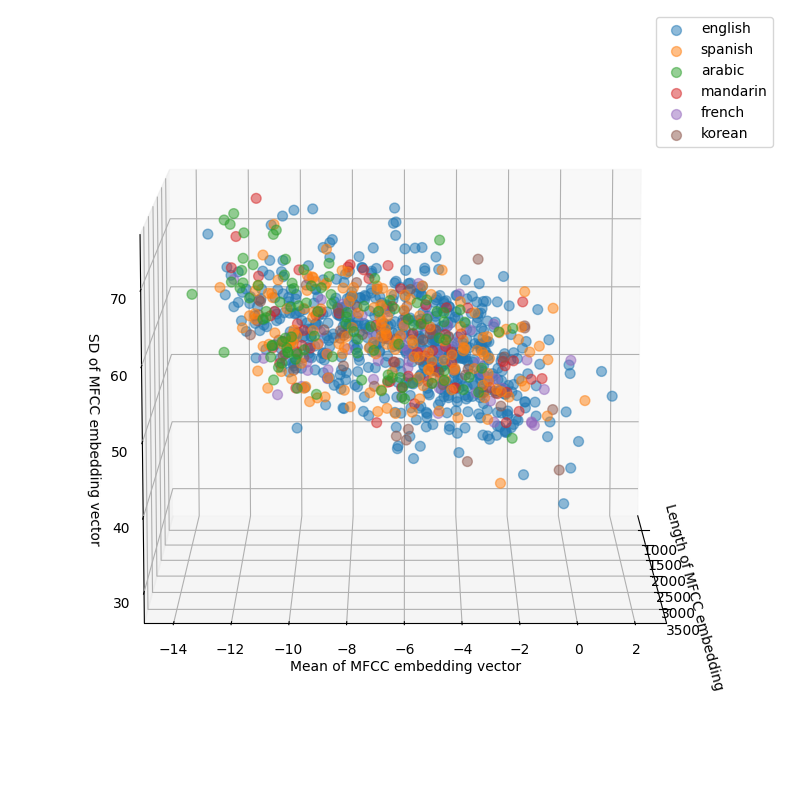

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
labels = np.array(labels)

modified_country_list = ['english', 'spanish']
for c in country_list:
#for c in modified_country_list:
  idx = np.where(labels == c)[0]
  print(c)
  print(len(idx))

  x = np.array(len_list)[idx]
  y = np.array(mean_list)[idx]
  z = np.array(sd_list)[idx]


  ax.scatter(x, y, z, label = c, s = 50, alpha = 0.5)

plt.legend()
ax.set_xlabel("Length of MFCC embedding")
ax.set_ylabel("Mean of MFCC embedding vector")
ax.set_zlabel("SD of MFCC embedding vector")
ax.view_init(10, 0, 0) # 10, 270, 0 shows len differences. 10, 0, 0 shows sd/mean comp
plt.show()

In [ ]:
print("----means----")

for key, value in means.items():
  print(key)
  print(sum(value)/len(value))


print("----SD----")

for key, value in sds.items():
  print(key)
  print(sum(value)/len(value))


print("----lengths----")
for key, value in lengths.items():
  print(key)
  print(sum(value)/len(value))

----means----
english
-5.9868813202634374
arabic
-8.280775152000727
mandarin
-6.4065660907672
spanish
-6.718525563309222
korean
-6.507481775748042
french
-5.787298136287266
----SD----
english
53.170667276069494
arabic
57.640692093793085
mandarin
55.16244641817533
spanish
54.69347318013509
korean
53.3497409086961
french
52.33739774189298
----lengths----
english
989.0777202072538
arabic
1462.7549019607843
mandarin
1350.876923076923
spanish
1288.3703703703704
korean
1330.5961538461538
french
1174.5714285714287
